In [1]:
import math
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1

Part a

In [10]:
def SIS(s_0, i_0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = s_0
            I[idx] = i_0
        else:
            dS_dt = (-beta * S[idx-1] * I[idx-1]) + gamma * I[idx-1]
            dI_dt = (beta * S[idx-1] * I[idx-1]) - gamma * I[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize

    
    return S, I, T

In [13]:
def analytical(i_0, beta, gamma, t):
    R_0 = beta / gamma
    numer = 1 - (1 / R_0)
    denom = 1 + ((1 - 1/R_0 - i_0) / i_0) * math.exp(- ((beta - gamma) * t))
    i_t = numer / denom
    
    return(i_t)


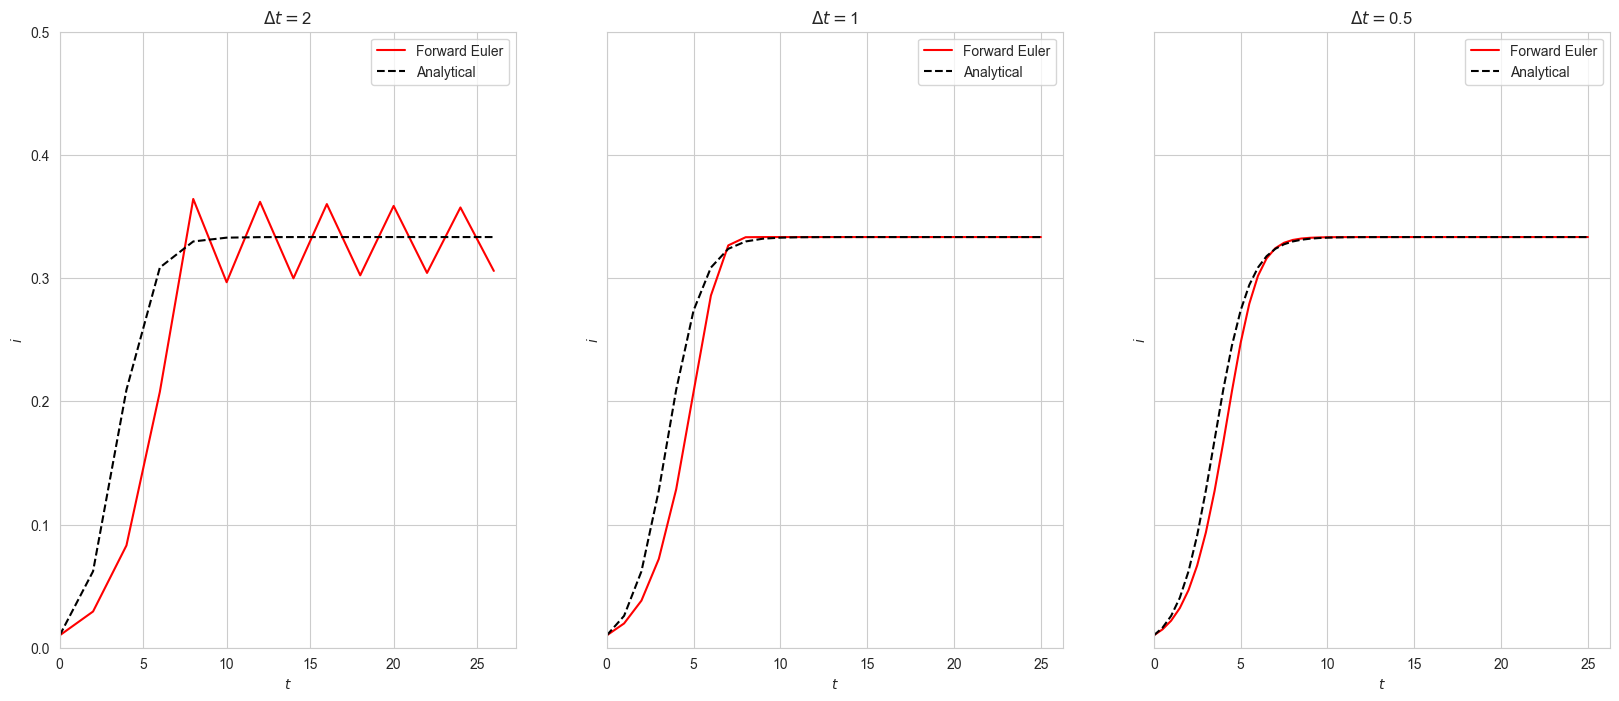

In [98]:
# SIS(S0, I0, beta, gamma, t_max, stepsize)
sns.set_style("whitegrid")
beta = 3
gamma = 2
stepsize = [2, 1, 1/2]

fig, axs = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(8)

for i in range(3):
    s_eul, i_eul,T = SIS(0.99, 0.01, beta, gamma, 25, stepsize[i])
    i_analytical = []
    for t in T:
        i_analytical.append(analytical(0.01, beta, gamma, t))

    axs[i].plot(T, i_eul, color='r', label='Forward Euler')
    axs[i].plot(T, i_analytical, color='black', linestyle = "dashed", label='Analytical')
    axs[i].set_ylabel(r'$i$')
    axs[i].set_ylim(0, 0.5)
    axs[i].set_xlabel(r'$t$')
    axs[i].legend()
    axs[i].set_ylim(bottom=0)
    axs[i].set_xlim(left=0)
    axs[i].set_title(r'$\Delta t = $' f'{stepsize[i]}' )

fig.savefig('hw2p1a.png', dpi=300, bbox_inches = "tight")

Part c

In [76]:
def compute_E(stepsize):
    beta = 3
    gamma = 2
    s_eul, i_eul, T = SIS(0.99, 0.01, beta, gamma, 25, stepsize)
    i_analytical = []
    for t in T:
        i_analytical.append(analytical(0.01, beta, gamma, t))
    
    return(max(abs(i_eul - i_analytical)))

Part d

In [77]:
E = []
steps = [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32]
for stepsize in steps:
    E.append(compute_E(stepsize))

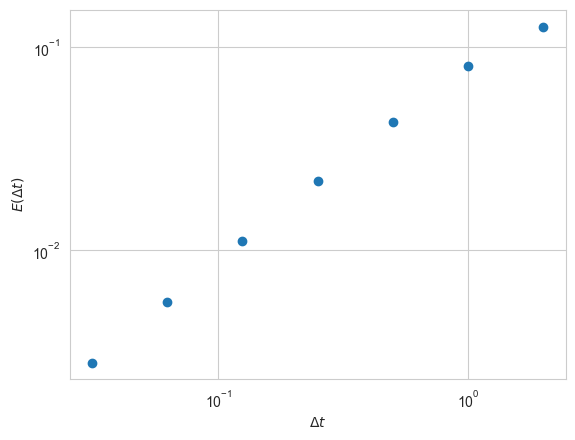

In [96]:
fig, ax = plt.subplots()
ax.scatter(steps, E)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$E(\Delta t)$')
ax.set_xlabel(r'$\Delta t$')
fig.savefig('hw2p1d.png', dpi=300, bbox_inches = "tight")

Text(0.5, 0, '$\\Delta t$')

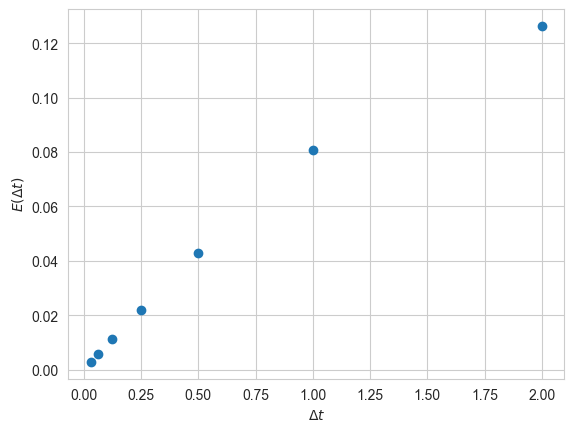

In [97]:
fig, ax = plt.subplots()
ax.scatter(steps, E)
ax.set_ylabel(r'$E(\Delta t)$')
ax.set_xlabel(r'$\Delta t$')